# (Ford GoBike System Data)
## by (Ibrahem Aljenaidel)

## Investigation Overview

> In this investagition I will try to provide the needed vizulaes betwewn some intersting variables to see there impcat on other variables sich as the Duration of the trip.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('df_clean.csv')

## Trip Duration

> This show the Distrubtion of the overall trip duartion. Most trips are 16 minute long or less.

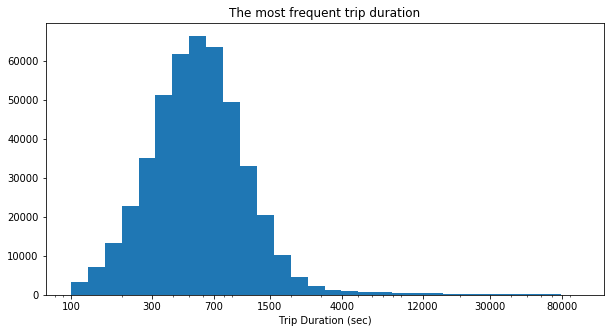

In [8]:
# 1. duration.
bins = 10 ** np.arange(2, 5.0 + 0.1, 0.1) 
plt.figure(figsize=[10, 5])
plt.hist(data=df_clean, x='duration_sec', bins=bins)
ticks = [100, 300, 700 , 1500, 4000, 12000, 30000, 80000]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (sec)')
plt.title('The most frequent trip duration')
plt.show();

## Days of trips

> Number of trips in each day. As ypu can see weekends are has far less trips than weekday as excpected.

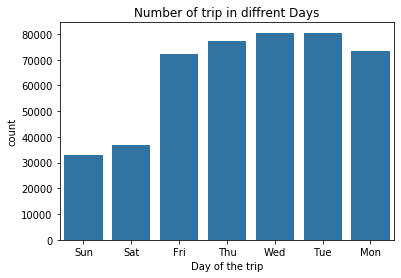

In [9]:
sb.countplot(data=df_clean, x='trip_day', color=sb.color_palette()[0]);
plt.xlabel('Day of the trip')
plt.title('Number of trip in diffrent Days');

## Age and Trip duration.
> When looking at the age and duration of the trips we see an inverse relationship, as age increses the duration decreases normally.

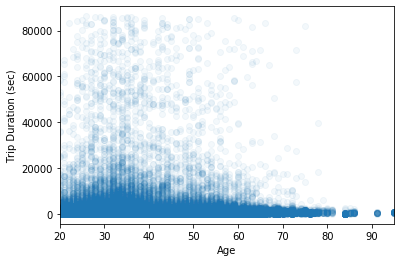

In [10]:
# a scatter plot.
plt.scatter(data=df_clean, x='age', y='duration_sec', alpha=1/20)
plt.xlim(20, 95) ## for better and focused result.
plt.xlabel('Age')
plt.ylabel('Trip Duration (sec)');

## Trip duration and Gender
> This a categorical scatter plot of the member gender and trip duration.

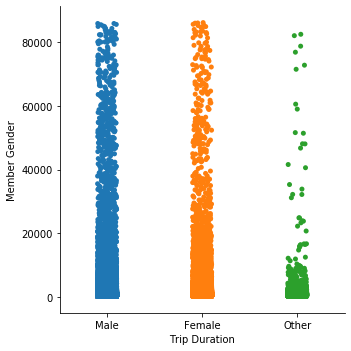

In [11]:
sb.catplot(x="member_gender", y="duration_sec", data=df_clean)
plt.xlabel('Trip Duration')
plt.ylabel('Member Gender');

## Trip Duration across user type in diffrent months.
> Looking at the member type the customer seem to have higher duration trip in avarge compared with a subscriber.

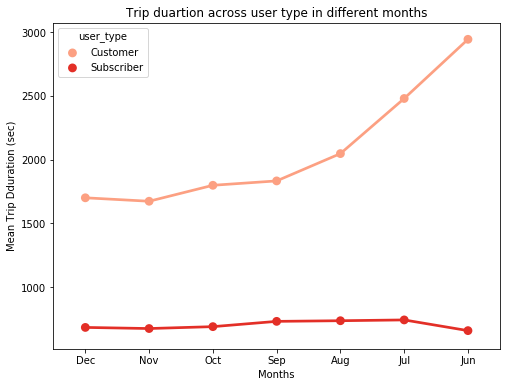

In [12]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'trip_month', y = 'duration_sec', hue = 'user_type', palette = 'Reds', ci=None)
plt.title('Trip duartion across user type in different months')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Months')
plt.show();

## Gender and Duration of trip in diffrent days
> This show the duration oof trip made in each day by member gender. Female tend to have higher trip duration in avarge. 

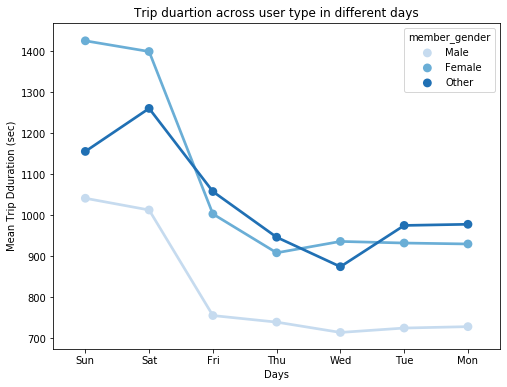

In [13]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'trip_day', y = 'duration_sec', hue = 'member_gender', palette = 'Blues', ci=None)
plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Days')
plt.show();

## A heatmap of user type and their hour of trip in each day.
> Looking at this we can see the hours when each trip were made between a subscriber and a customer. The weekend of the subscriber seem to be not active on the other hand the customer has alot of trips taking between the 9am to 10am approximately.

Text(0.5, 365.50909090909096, 'Hour of th trip')

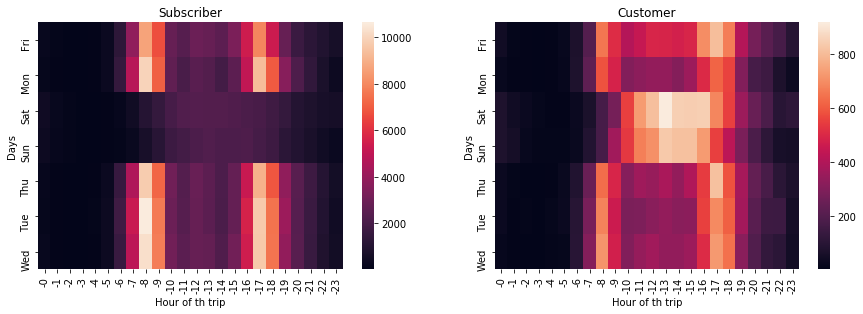

In [17]:
df_sub = df_clean.query('user_type == "Subscriber"').groupby(['trip_day','trip_hour'], 
                                                           as_index=False).size().reset_index(name='')
df_cus = df_clean.query('user_type == "Customer"').groupby(['trip_day','trip_hour'], 
                                                           as_index=False).size().reset_index(name='')
          
plt.figure(figsize = [15, 10]) # larger figure size for subplots


plt.subplot(2,2,1)
sb.heatmap(df_sub.pivot('trip_day','trip_hour'))
plt.title('Subscriber')
plt.ylabel('Days')
plt.xlabel('Hour of th trip')

plt.subplot(2,2,2) 
sb.heatmap(df_cus.pivot('trip_day','trip_hour'))
plt.title('Customer')
plt.ylabel('Days')
plt.xlabel('Hour of th trip')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!